In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(phi):
    """
    A Bradley--Harper cikkben szereplő ábra reprodukálása adott paraméterek esetén.
    """
    
    # beesés szöge
    phi = 2*np.pi/360 *phi
    
    # a cikkben szereplő szögfüggő tagok
    A = (a/alpha)**2 * np.sin(phi)
    B_1 = (a/alpha)**2 * np.sin(phi)**2 + (a/beta)**2 * np.cos(phi)**2
    B_2 = (a/alpha)**2 * np.cos(phi)
    C = 1/2 * ((a/beta)**2 - (a/alpha)**2) * np.sin(phi) * np.cos(phi)
    
    # a porlasztási hozam
    Y_0_1 = Lambda * epsilon * n * a / ((2*np.pi)**(1/2) * alpha * beta)
    Y_0_2 = np.exp(-a**2 / (2 * alpha**2) * B_1**(-1/2))
    Y_0_3 = np.exp(A**2 / (2*B_1**2))
    Y_0 = Y_0_1 * Y_0_2 * Y_0_3
    
    # a gamma függvények
    func_1 = A/B_1 * np.sin(phi)
    func_2 = B_2 / (2*B_1) * (1 + A**2 / B_1) * np.cos(phi)
    func_3 = A * C / B_1**2 * (3 + A**2 / B_1) * np.cos(phi)
      
    gamma_one = func_1 - func_2 - func_3
    gamma_two = - beta**2 / a**2 * (1/2 * B_2 + A * C / B_1) * np.cos(phi)
    
    # az elfordulási szög számolása
    loc = (abs(gamma_one - gamma_two) < 0.001) * phi
    theta_c = loc.max()

    return gamma_one, gamma_two, theta_c

## Paraméterek

In [3]:
Lambda = 2    #roughly two atoms/ions
epsilon = 30e3    #ion energy
n = 8.4531e22 #atoms/cm3
f = 1.912e-1    #dE/dx electron
B = 2e-22    #Blakely and Mykura
a = 98e-10    #projected range
alpha = 53e-10    #longitudinal straggling
beta = 38e-10    #lateral straggling


phi = np.linspace(0, 90, 100000)

## $\Gamma$ fügvények számolása és az elfordulási pont

In [4]:
gamma_one, gamma_two, theta_c = func(phi)

## Ábra

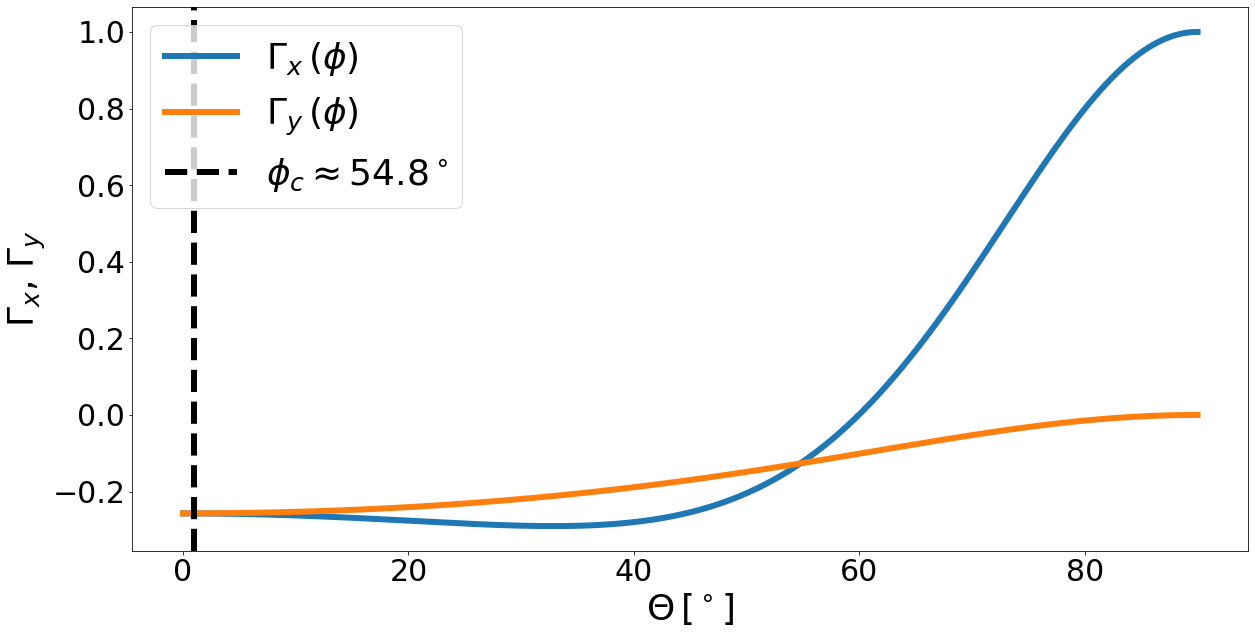

In [5]:
plt.figure(figsize=(20,10))

plt.plot(phi, gamma_one, linewidth=6, label=r'$\Gamma_x \, (\phi)$')
plt.plot(phi, gamma_two, linewidth=6, label=r'$\Gamma_y \, (\phi)$')

plt.axvline(theta_c, linewidth=6, linestyle="--", color="k", label=r'$\phi_c \approx 54.8^\circ$')

plt.xlabel(r'$\Theta \, [^\circ]$', fontsize=36)
plt.ylabel(r'$\Gamma_x$, $\Gamma_y$', fontsize=36)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=2, fontsize=36)

plt.savefig("../latex/images/bh.png", dpi=300)